# Model Import and Prediction
---
13516013 - Azka Nabilah Mumtaz <br>
13516062 - Yusuf Rahmat Pratama<br>
13516095 - Faza Fahleraz<br>
13516101 - Kelvin Kristian<br>
13516102 - Steven Sukma Limanus

In this section, the exported model will be imported and used to predict test data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

## Model Import & Data Preparation
---
##### Model Import
Here the external file which holds the exported model from the training section is imported and assigned to a variable

In [53]:
imported_model = joblib.load('../models/heart_disease.joblib')
imported_model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 80), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

##### Load Test Data
Test data are loaded here

In [46]:
test = pd.read_csv('../data/tubes2_HeartDisease_test.csv')
test.columns = ['age', 'sex', 'chest_pain_type', 'rest_blood_pressure', 'serum_cholestrol', 
                 'high_fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                 'st_depression', 'peak_exercise_st', 'major_vessels_num', 'thal']

test.head()

,age,sex,chest_pain_type,rest_blood_pressure,serum_cholestrol,high_fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,peak_exercise_st,major_vessels_num,thal
0,60,1,2,160,267,1,1,157,0,0.5,2,?,?
1,61,1,4,148,203,0,0,161,0,0,1,1,7
2,54,1,4,130,242,0,0,91,1,1,2,?,?
3,48,1,4,120,260,0,0,115,0,2,2,?,?
4,57,0,1,130,308,0,0,98,0,1,2,?,?


### Preprocessing

#### Handle missing values
Some data contain unknown value in some of their attributes, therefore needed to be processed. 

The string '?' that represents the unknown value is replaced with NaN to make data uniformly numeric, and all data are cast into float to process NaN as well (NaN is represented as float in Numpy). 

In [47]:
test = test.replace('?', np.nan).astype(float)

For now, mean of each attributes is used to input value to the unknown-valued data for the free-discrete attributes, and mode of each attributes is used for the ranged discrete attributes.

In [48]:
categorical_attributes = ["sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", "exercise_induced_angina", "peak_exercise_st", "major_vessels_num", "thal"]
series_attributes = ["age", "rest_blood_pressure", "serum_cholestrol", "max_heart_rate", "st_depression"]

test[categorical_attributes] = test[categorical_attributes].fillna(test.mode().iloc[0])
test[series_attributes] = test[series_attributes].fillna(test.mean())
test[categorical_attributes] = test[categorical_attributes].astype('category')

test.head()

,age,sex,chest_pain_type,rest_blood_pressure,serum_cholestrol,high_fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,peak_exercise_st,major_vessels_num,thal
0,60.0,1.0,2.0,160.0,267.0,1.0,1.0,157.0,0.0,0.5,2.0,0.0,7.0
1,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0
2,54.0,1.0,4.0,130.0,242.0,0.0,0.0,91.0,1.0,1.0,2.0,0.0,7.0
3,48.0,1.0,4.0,120.0,260.0,0.0,0.0,115.0,0.0,2.0,2.0,0.0,7.0
4,57.0,0.0,1.0,130.0,308.0,0.0,0.0,98.0,0.0,1.0,2.0,0.0,7.0


##### Rearrange Columns
Columns are rearranged with one-hot encoding to make it equivalent with the preprocessed train data

In [49]:
test = test.drop('thal', 1)
test = test.drop('major_vessels_num', 1)

test = pd.get_dummies(test, prefix=[
    "sex", "chest_pain_type", "high_fasting_blood_sugar", "resting_ecg", 
    "exercise_induced_angina", "peak_exercise_st"])


test.head()

,age,rest_blood_pressure,serum_cholestrol,max_heart_rate,st_depression,sex_0.0,sex_1.0,chest_pain_type_1.0,chest_pain_type_2.0,chest_pain_type_3.0,...,high_fasting_blood_sugar_0.0,high_fasting_blood_sugar_1.0,resting_ecg_0.0,resting_ecg_1.0,resting_ecg_2.0,exercise_induced_angina_0.0,exercise_induced_angina_1.0,peak_exercise_st_1.0,peak_exercise_st_2.0,peak_exercise_st_3.0
0,60.0,160.0,267.0,157.0,0.5,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,61.0,148.0,203.0,161.0,0.0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,54.0,130.0,242.0,91.0,1.0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,48.0,120.0,260.0,115.0,2.0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,57.0,130.0,308.0,98.0,1.0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0


## Test Data Prediction
---
Here the test data will be labeled using model prediction fitted from the training data

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

##### Predicting Test Data

In [54]:
test = np.array(test)
predicted_test = imported_model.predict(test)
predicted_test

array([0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 4, 3, 0, 0, 1, 0, 2,
       0, 1, 3, 0, 1, 3, 4, 1, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 4, 2, 0, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 3, 0, 3, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 4,
       1, 3, 0, 0, 0, 2, 0, 3, 0, 1, 2, 1, 0, 1, 0, 0, 0, 3, 3, 1, 0, 1,
       3, 2, 3, 3, 0, 0, 0, 0, 0])

##### Visualizing Predicted Data


<Container object of 5 artists>

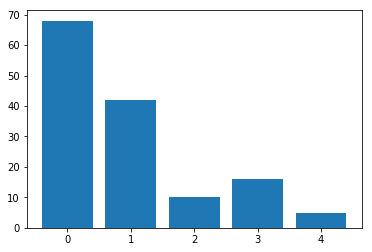

In [64]:
x, y = np.unique(predicted_test, return_counts=True)
plt.bar(x, y)